#Abstractions in decision making

What do you mean with abstractions? Give some intro

##Taxonomy example

Find a good taxonomy - should have the following aspects:
*  Three levels of abstraction
*  For some observations there should be a specific (best) action
*  For other observations several specific action will have the same value (right now we don't have this)?
*  For groups of observations there is a suboptimal action that does well on all observations (right now we have two levels of this)



Things to show: 
*  Multi-task decision-making
  *  Can you include this into the taxonomy?
*  Levels of abstraction emerge somewhat naturally (because agent is embodied, structure of utility-function is reflected in policy)
 *  We have this.
*  Changing the level of granularity (coarse-graining)
  *  Similar to the pattern-example of NIPS, can this be somehow included (probably we would need redundant actions, i.e. a subset of observations shares the optimal action with another subset of observations, but the latter has even more actions that yield maximum utility, which are then redundant). On the other hand isn't changing the level of granularity by moving up the hierarchy of abstractions doing exaclty this?

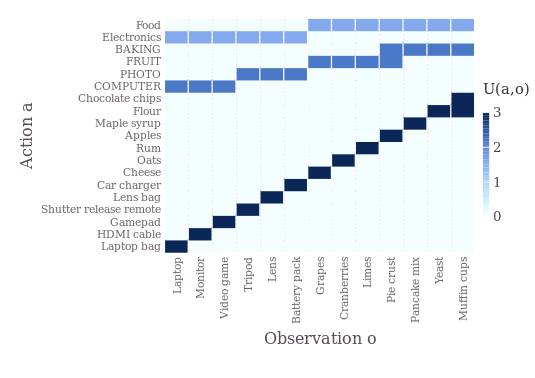

In [9]:
using RateDistortionDecisionMaking, Gadfly

#set up taxonomy example
include("TaxonomyExample.jl")
o_vec, o_strings, a_vec, a_strings, p_o, U = setuptaxonomy()


#pre-compute utilities, find maxima
U_pre, Umax = setuputilityarrays(a_vec,o_vec,U)

#visualize utility
plt_utility = visualizeMatrix(U_pre, o_vec, a_vec, o_strings, a_strings, xlabel="Observation o",
                              ylabel="Action a", legendlabel="U(a,o)")


In [10]:
β = 1 #inverse temperature
ε = 0.000001 #convergence critetion for BAiterations
maxiter = 10000 #maximum number of BA iterations

#initialize p(a) uniformly
num_acts = length(a_vec)
pa_init = ones(num_acts)/num_acts 

#Blahut-Arimotot iterations
p_ago, p_a, performance = BAiterations(pa_init, β, U_pre, Umax, p_o, ε, maxiter, compute_performance=true, 
                                       performance_as_dataframe=true, performance_per_iteration=false)


#visualize solution
#suppress immediate plotting since the stacked plots look bad, rather use display() to show each plot separately
plot_marg, plot_cond = visualizeBAsolution(p_a, p_ago, a_vec, o_vec, a_strings, o_strings,
                                           olabel="Observation o", alabel="Action a",
                                           legendlabel_marginal="p(a)", legendlabel_conditional="p*(a|o)",suppress_vis=true);
display(plot_marg)
display(plot_cond)


<?xml version="1.0" encoding="UTF-8"?>
 
 
 
 
 0.0 
 1.0 
 0.5 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p(a) 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 Laptop bag 
 HDMI cable 
 Gamepad 
 Shutter release remote 
 Lens bag 
 Car charger 
 Cheese 
 Oats 
 Rum 
 Apples 
 Maple syrup 
 Flour 
 Chocolate chips 
 COMPUTER 
 PHOTO 
 FRUIT 
 BAKING 
 Electronics 
 Food 
 
 
 Action a

<?xml version="1.0" encoding="UTF-8"?>
 
 
 
 Observation o 
 
 
 Laptop 
 Monitor 
 Video game 
 Tripod 
 Lens 
 Battery pack 
 Grapes 
 Cranberries 
 Limes 
 Pie crust 
 Pancake mix 
 Yeast 
 Muffin cups 
 
 
 
 0.0 
 1.0 
 0.5 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p*(a|o) 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 Laptop bag 
 HDMI cable 
 Gamepad 
 Shutter release remote 
 Lens bag 
 Car charger 
 Cheese 
 Oats 
 Rum 
 Apples 
 Maple syrup 
 Flour 
 Chocolate chips 
 COMPUTER 
 PHOTO 
 FRUIT 
 BAKING 
 Electronics 
 Food 
 
 
 Action a

In [14]:
#β-sweep

ε = 0.00001 #convergence critetion for BAiterations
maxiter = 10000
β_sweep = [0.01:0.005:3]
#β_sweep = [0.1:0.05:2, 2:0.5:15]

nβ = length(β_sweep)

#preallocate
I = zeros(nβ)
Ha = zeros(nβ)
Hago = zeros(nβ)
EU = zeros(nβ)
RDobj = zeros(nβ)

for i=1:nβ    
    pago, pa, I[i], Ha[i], Hago[i], EU[i], RDobj[i] = BAiterations(pa_init, β_sweep[i], U_pre, Umax, p_o, ε, maxiter,compute_performance=true)  
end

plot_perf_entropy, plot_perf_util, plot_rateutility = plotperformancemeasures(I, Ha, Hago, EU, RDobj, β_sweep);

<?xml version="1.0" encoding="UTF-8"?>
 
 
 
 β 
 
 
 -4 
 -3 
 -2 
 -1 
 0 
 1 
 2 
 3 
 4 
 5 
 6 
 7 
 -3.0 
 -2.9 
 -2.8 
 -2.7 
 -2.6 
 -2.5 
 -2.4 
 -2.3 
 -2.2 
 -2.1 
 -2.0 
 -1.9 
 -1.8 
 -1.7 
 -1.6 
 -1.5 
 -1.4 
 -1.3 
 -1.2 
 -1.1 
 -1.0 
 -0.9 
 -0.8 
 -0.7 
 -0.6 
 -0.5 
 -0.4 
 -0.3 
 -0.2 
 -0.1 
 0.0 
 0.1 
 0.2 
 0.3 
 0.4 
 0.5 
 0.6 
 0.7 
 0.8 
 0.9 
 1.0 
 1.1 
 1.2 
 1.3 
 1.4 
 1.5 
 1.6 
 1.7 
 1.8 
 1.9 
 2.0 
 2.1 
 2.2 
 2.3 
 2.4 
 2.5 
 2.6 
 2.7 
 2.8 
 2.9 
 3.0 
 3.1 
 3.2 
 3.3 
 3.4 
 3.5 
 3.6 
 3.7 
 3.8 
 3.9 
 4.0 
 4.1 
 4.2 
 4.3 
 4.4 
 4.5 
 4.6 
 4.7 
 4.8 
 4.9 
 5.0 
 5.1 
 5.2 
 5.3 
 5.4 
 5.5 
 5.6 
 5.7 
 5.8 
 5.9 
 6.0 
 -3 
 0 
 3 
 6 
 -3.0 
 -2.8 
 -2.6 
 -2.4 
 -2.2 
 -2.0 
 -1.8 
 -1.6 
 -1.4 
 -1.2 
 -1.0 
 -0.8 
 -0.6 
 -0.4 
 -0.2 
 0.0 
 0.2 
 0.4 
 0.6 
 0.8 
 1.0 
 1.2 
 1.4 
 1.6 
 1.8 
 2.0 
 2.2 
 2.4 
 2.6 
 2.8 
 3.0 
 3.2 
 3.4 
 3.6 
 3.8 
 4.0 
 4.2 
 4.4 
 4.6 
 4.8 
 5.0 
 5.2 
 5.4 
 5.6 
 5.8 
 6.0 
 
 
 
 E[U] 
 RU_obj 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <path fill="none" d="M18.88,72.24 L 19.05 72.23 19.21 72.23 19.38 72.23 19.55 72.23 19.71 72.23 19.88 72.23 20.05 72.23 20.21 72.23 20.38 72.23 20.55 72.23 20.71 72.23 20.88 72.23 21.05 72.23 21.21 72.23 21.38 72.23 21.55 72.22 21.71 72.22 21.88 72.21 22.05 72.19 22.21 72.17 22.38 72.14 22.54 72.12 22.71 72.1 22.88 72.08 23.04 72.05 23.21 72.03 23.38 72.01 23.54 71.99 23.71 71.97 23.88 71.94 24.04 71.92 24.21 71.9 24.38 71.88 24.54 71.85 24.71 71.83 24.88 71.81 25.04 71.79 25.21 71.76 25.38 71.74 25.54 71.72 25.71 71.7 25.88 71.68 26.04 71.65 26.21 71.63 26.38 71.61 26.54 71.59 26.71 71.57 26.88 71.54 27.04 71.52 27.21 71.5 27.38 71.48 27.54 71.46 27.71 71.44 27.88 71.41 28.04 71.39 28.21 71.37 28.38 71.35 28.54 71.33 28.71 71.31 28.88 71.28 29.04 71.26 29.21 71.24 29.38 71.22 29.54 71.2 29.71 71.18 29.88 71.16 30.04 71.14 30.21 71.11 30.38 71.09 30.54 71.07 30.71 71.05 30.87 71.03 31.04 71.01 31.21 70.99 31.37 70.97 31.54 70.95 31.71 70.93 31.87 70.91 32.04 70.88 32.21 70.86 32.37 70.84 32.54 70.82 32.71 70.8 32.87 70.78 33.04 70.76 33.21 70.74 33.37 70.72 33.54 70.7 33.71 70.68 33.87 70.66 34.04 70.64 34.21 70.62 34.37 70.6 34.54 70.58 34.71 70.56 34.87 70.54 35.04 70.52 35.21 70.5 35.37 70.48 35.54 70.46 35.71 70.45 35.87 70.43 36.04 70.41 36.21 70.39 36.37 70.37 36.54 70.35 36.71 70.33 36.87 70.31 37.04 70.29 37.21 70.27 37.37 70.26 37.54 70.24 37.71 70.22 37.87 70.2 38.04 70.18 38.21 70.16 38.37 70.14 38.54 70.13 38.7 70.11 38.87 70.09 39.04 70.07 39.2 70.05 39.37 70.03 39.54 70.02 39.7 70 39.87 69.98 40.04 69.96 40.2 69.94 40.37 69.92 40.54 69.9 40.7 69.88 40.87 69.84 41.04 69.79 41.2 69.74 41.37 69.68 41.54 69.62 41.7 69.55 41.87 69.45 42.04 69.35 42.2 69.25 42.37 69.15 42.54 69.05 42.7 68.95 42.87 68.86 43.04 68.76 43.2 68.66 43.37 68.57 43.54 68.52 43.7 68.48 43.87 68.45 44.04 68.42 44.2 68.38 44.37 68.35 44.54 68.32 44.7 68.29 44.87 68.26 45.04 68.23 45.2 68.19 45.37 68.16 45.54 68.13 45.7 68.1 45.87 68.07 46.04 68.04 46.2 68.01 46.37 67.98 46.53 67.95 46.7 67.92 46.87 67.89 47.03 67.86 47.2 67.83 47.37 67.8 47.53 67.77 47.7 67.74 47.87 67.72 48.03 67.69 48.2 67.66 48.37 67.63 48.53 67.6 48.7 67.57 48.87 67.55 49.03 67.52 49.2 67.49 49.37 67.46 49.53 67.44 49.7 67.41 49.87 67.38 50.03 67.36 50.2 67.33 50.37 67.3 50.53 67.27 50.7 67.23 50.87 66.32 51.03 66.26 51.2 66.22 51.37 66.18 51.53 

<?xml version="1.0" encoding="UTF-8"?>
 
 
 
 I(A;O) [bits] 
 
 
 -5 
 -4 
 -3 
 -2 
 -1 
 0 
 1 
 2 
 3 
 4 
 5 
 6 
 7 
 8 
 9 
 -4.0 
 -3.8 
 -3.6 
 -3.4 
 -3.2 
 -3.0 
 -2.8 
 -2.6 
 -2.4 
 -2.2 
 -2.0 
 -1.8 
 -1.6 
 -1.4 
 -1.2 
 -1.0 
 -0.8 
 -0.6 
 -0.4 
 -0.2 
 0.0 
 0.2 
 0.4 
 0.6 
 0.8 
 1.0 
 1.2 
 1.4 
 1.6 
 1.8 
 2.0 
 2.2 
 2.4 
 2.6 
 2.8 
 3.0 
 3.2 
 3.4 
 3.6 
 3.8 
 4.0 
 4.2 
 4.4 
 4.6 
 4.8 
 5.0 
 5.2 
 5.4 
 5.6 
 5.8 
 6.0 
 6.2 
 6.4 
 6.6 
 6.8 
 7.0 
 7.2 
 7.4 
 7.6 
 7.8 
 8.0 
 -5 
 0 
 5 
 10 
 -4.0 
 -3.5 
 -3.0 
 -2.5 
 -2.0 
 -1.5 
 -1.0 
 -0.5 
 0.0 
 0.5 
 1.0 
 1.5 
 2.0 
 2.5 
 3.0 
 3.5 
 4.0 
 4.5 
 5.0 
 5.5 
 6.0 
 6.5 
 7.0 
 7.5 
 8.0 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <path d="M120.72,7.1 L 120.71 7.1 120.7 7.1 120.7 7.1 120.69 7.1 120.68 7.1 120.67 7.11 120.66 7.11 120.66 7.11 120.65 7.11 120.64 7.11 120.63 7.11 120.62 7.12 120.61 7.12 120.6 7.12 120.59 7.12 120.58 7.12 120.57 7.12 120.56 7.13 120.56 7.13 120.55 7.13 120.54 7.13 120.53 7.13 120.51 7.14 120.5 7.14 120.49 7.14 120.48 7.14 120.47 7.14 120.46 7.15 120.45 7.15 120.44 7.15 120.43 7.15 120.42 7.16 120.4 7.16 120.39 7.16 120.38 7.16 120.37 7.17 120.36 7.17 120.34 7.17 120.33 7.17 120.32 7.18 120.3 7.18 120.29 7.18 120.28 7.18 120.26 7.19 120.25 7.19 120.24 7.19 120.22 7.2 120.21 7.2 120.19 7.2 120.18 7.2 120.16 7.21 120.15 7.21 120.13 7.21 120.12 7.22 120.1 7.22 120.09 7.22 120.07 7.23 120.05 7.23 120.04 7.23 120.02 7.24 120 7.24 119.99 7.24 119.97 7.25 119.95 7.25 119.93 7.26 119.92 7.26 119.9 7.26 119.88 7.27 119.86 7.27 119.84 7.28 119.82 7.28 119.8 7.28 119.78 7.29 119.76 7.29 119.74 7.3 119.72 7.3 119.7 7.31 119.68 7.31 119.66 7.32 119.64 7.32 119.61 7.33 119.59 7.33 119.57 7.33 119.55 7.34 119.52 7.35 119.5 7.35 119.48 7.36 119.45 7.36 119.43 7.37 119.4 7.37 119.38 7.38 119.35 7.38 119.33 7.39 119.3 7.39 119.27 7.4 119.25 7.41 119.22 7.41 119.19 7.42 119.17 7.43 119.14 7.43 119.11 7.44 119.08 7.44 119.05 7.45 119.02 7.46 118.99 7.47 118.96 7.47 118.93 7.48 118.9 7.49 118.87 7.49 118.84 7.5 118.8 7.51 118.77 7.52 118.74 7.52 118.7 7.53 118.67 7.54 118.64 7.55 118.6 7.56 118.57 7.56 118.53 7.57 118.49 7.58 118.46 7.59 118.42 7.6 118.38 7.61 118.34 7.62 118.3 7.63 118.27 7.64 118.23 7.65 118.19 7.65 118.15 7.66 118.1 7.67 118.06 7.68 118.02 7.7 117.98 7.71 117.93 7.72 117.89 7.73 117.85 7.74 117.8 7.75 117.76 7.76 117.71 7.77 117.66 7.78 117.62 7.79 117.57 7.81 117.52 7.82 117.47 7.83 117.42 7.84 117.37 7.86 117.32 7.87 117.27 7.88 117.22 7.89 117.16 7.91 117.11 7.92 117.06 7.94 117 7.95 116.95 7.96 116.89 7.98 116.83 7.99 116.78 8.01 116.72 8.02 116.66 8.04 116.6 8.05 116.54 8.07 116.48 8.08 116.41 8.1 116.35 8.12 116.29 8.13 116.22 8.15 116.16 8.17 116.09 8.18 116.03 8.2 115.96 8.22 115.89 8.24 115.82 8.26 115.75 8.28 115.68 8.29 115.61 8.31 115.54 8.33 115.46 8.35 115.39 8.37 115.31 8.39 115.24 8.41 115.16 8.43 115.08 8.46 115 8.48 114.92 8.5 114.84 8.52 114.76 8.54 114.68 8.57 114.59 8.59 114.51 8.61 114.42 8.64 114.34 8.66 114.25 8.69 114.16 8.71 114.07 8.74 113.98 8.76 113.88 8.79 113.79 8.81 113.7 8.84 113.6 8.87 113.5 8.89 113.41 8.92 113.31 8.95 113.21 8.98 113.11 9.01 113 9.04 112.9 9.07 112.8 9.1 112.69 9.13 112.58 9.16 112.47 9.19 112.36 9.22 112.25 9.26 112.14 9.29 112.03 9.32 111.91 9.36 111.8 9.39 111.68 9.43 111.56 9.46 111.44 9.5 111.32 9.53 111.19 9.57 111.07 9.61 110.94 9.65 110.82 9.69 110.69 9.72 110.56 9.76 110.42 9.8 110.29 9.84 110.16 9.89 110.02 9.93 109.88 9.97 109.74 10.01 109.6 10.06 109.46 10

In [21]:
#create a plot where the entropic performance plot is shown and on top of it several solutions of p(a|o)
#for different tempereatures (ideally lying in the plateaus)

β_plts = [0.1, 0.5, 0.9, 1.05, 1.2, 1.5, 2]
#β_plts = [0.1, 1.2, 2]

nβ = length(β_plts)

#preallocate
I = zeros(nβ)
Ha = zeros(nβ)
Hago = zeros(nβ)
EU = zeros(nβ)
RDobj = zeros(nβ)
plots = Array(Plot,nβ)

for i=1:nβ    
    pago, pa, I[i], Ha[i], Hago[i], EU[i], RDobj[i] = BAiterations(pa_init, β_plts[i], U_pre, Umax, p_o, ε, maxiter,compute_performance=true)  

    #except for the last plot, provide an optional argument that will be passed on to the underlying Gadfly Theme()
    #to suppress drawing of the colorkey (legend)
    β_val = β_plts[i]
    if i==1
        pcond = visualizeBAconditional(pago, a_vec, o_vec, olabel="Observation o β=$β_val", alabel="Action a", 
        legendlabel="", key_position = :none, minor_label_font_size = 0pt,  major_label_font_size = 9pt,
        bar_spacing = 0pt)
    elseif i<nβ
        pcond = visualizeBAconditional(pago, a_vec, o_vec, olabel="β=$β_val", alabel="",
        legendlabel="", key_position = :none,  minor_label_font_size = 0pt,  major_label_font_size = 9pt,
        bar_spacing = 0pt)
    else
        pcond = visualizeBAconditional(pago, a_vec, o_vec, olabel="β=$β_val", alabel="",
        legendlabel="p*(a|o)",  minor_label_font_size = 0pt, major_label_font_size = 9pt,
        key_title_font_size = 9pt, key_label_font_size = 8pt, bar_spacing = 0pt )
    end

    #display(pcond)
    plots[i] = pcond
end

#compose final plot
#use this one for the notebook
plot_evolution = vstack(hstack(plots...),plot_perf_entropy)
#use the one below for the paper
#plot_evolution = vstack(vstack(plot_perf_util, plot_perf_entropy),hstack(plots...))

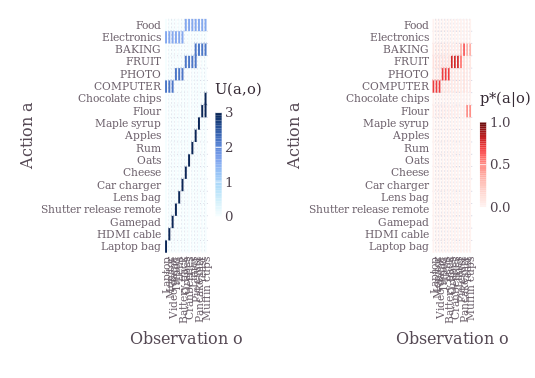

In [13]:
#uncomment to store plots

#plot_performance = vstack(plot_perf_entropy, plot_perf_util)
#draw(SVG("Figures/TempSweep_Performance.svg", 8.5cm, 11cm), plot_performance)
#draw(SVG("Figures/RateUtilityCurve.svg", 8.5cm, 7cm), plot_rateutility)

#draw(SVG("Figures/TempSweepEvolution.svg", 18cm, 19cm), plot_evolution)

plot_setup = hstack(plt_utility, plot_cond)
#draw(SVG("Figures/TaskSetupAndExmplSolution.svg",18cm,12cm),plot_setup)